_This notebook contains code and comments from Section 1.3 of the book [Ensemble Methods for Machine Learning](http://www.manning.com). Please see the book for additional details on this topic. This notebook and code are released under the [MIT license](https://github.com/gkunapuli/ensemble-methods-notebooks/blob/master/LICENSE)._

---

## 1.3 Fit vs. Complexity in Machine-Learning Models 

We will explore fit vs. complexity (a simpler view of the bias-variance dilemma) through a regression task on the classic benchmark **Boston Housing** data set.

First, load and view the data set using pandas

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['price'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Standardize the data to be zero-mean, unit standard deviation, and the labels to be in the range [-1, 1].

In [2]:
from sklearn.preprocessing import StandardScaler
X, y = load_boston(return_X_y=True)

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(-1, 1))

### 1.3.1 Regression with Decision Trees

Perform 5 runs of the following:
- Split the data into training (67%) and test (33%) sets randomly
- Fit (train) decision trees of different depths in the range 1 to 10 on the training set 
- Evaluate each of the trees on both the training set (to get the training score) and test set (to get the test score) using [R2 coefficient](https://en.wikipedia.org/wiki/Coefficient_of_determination) as the scoring metric

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
import numpy as np

subsets = ShuffleSplit(n_splits=5, test_size=0.33, random_state=23)

model = DecisionTreeRegressor()
trn_scores, tst_scores = validation_curve(model, X, y, \
                param_name='max_depth', param_range=range(1, 11), \
                cv=subsets, scoring='r2')
mean_train_score = np.mean(trn_scores, axis=1) 
mean_test_score = np.mean(tst_scores, axis=1)  

Plot the training and test score curves.

In [4]:
import matplotlib.pyplot as plt
from visualization import get_colors
col = get_colors(colormap='RdBu')

plt.plot(range(1, 11), mean_train_score, linewidth=3, color=col[0], marker='o', markersize=8);
plt.plot(range(1, 11), mean_test_score, linewidth=3, color=col[1], marker='s', markersize=8);
plt.legend(['training score', 'test_score'], loc='lower center', ncol=2, fontsize=12)
plt.xlabel('Decision Tree Complexity, max_depth', fontsize=16);
plt.ylabel('$R^2$ coefficient', fontsize=16);
plt.xticks(range(1, 11));
plt.title('Decision Tree Regression', fontsize=16)

plt.savefig('./figures/CH01_F05_Kunapuli.png', format='png', dpi=300);

An R2 score close to 1 means that the model achieves nearly zero error and is very good. 

As decision trees become deeper (more complex) the training scores increase and the resulting models **fit** the data increasingly better. However, the test scores do not correspondingly increase and the resulting models do not **generalize** better. Thus, the most complex model with the best fit on the training set is not necessarily the best model for future predictions.

### 1.3.2 Regression with Support Vector Machines

Perform 5 runs of the following:
- Use the same subsets from the previous experiment with decision trees
- Fit (train) SVRs of different with different C values (10<sup>-2</sup>, 10<sup>-1</sup>, ..., 10<sup>3</sup>, 10<sup>4</sup>) on the training set 
- Evaluate each of the trees on both the training set (to get the training score) and test set (to get the test score) using [R2 coefficient](https://en.wikipedia.org/wiki/Coefficient_of_determination) as the scoring metric

In [5]:
from sklearn.svm import SVR

model = SVR(degree=3)
trn_scores, tst_scores = validation_curve(model, X, y.ravel(),    
                                          param_name='C',  
                                          param_range=np.logspace(-2,4,7), 
                                          cv=subsets, scoring='r2')

mean_train_score = np.mean(trn_scores, axis=1) 
mean_test_score = np.mean(tst_scores, axis=1)  

Plot the training and test score curves.

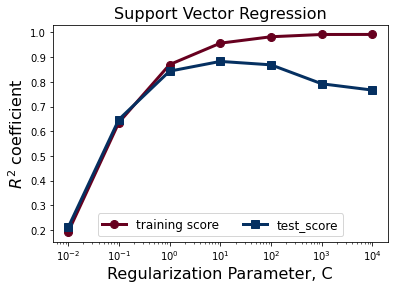

In [6]:
plt.semilogx(np.logspace(-2, 4, 7), mean_train_score, linewidth=3, color=col[0], marker='o', markersize=8);
plt.semilogx(np.logspace(-2, 4, 7), mean_test_score, linewidth=3, color=col[1], marker='s', markersize=8);
plt.legend(['training score', 'test_score'], loc='lower center', ncol=2, fontsize=12);
plt.xlabel('Regularization Parameter, C', fontsize=16);
plt.ylabel('$R^2$ coefficient', fontsize=16);
plt.title('Support Vector Regression', fontsize=16)

# Save this figure
plt.savefig('./figures/CH01_F07_Kunapuli.png', format='png', dpi=300);

SVMs aim to minimize an objective function of the form 

_objective function = complexity(model) + C*loss(model, data)._

As C increases, the loss term becomes more dominant, forcing the SVM to minimize the loss and improve the fit. As it does so however, for larger values of C, the complexity term is increasingly ignored and the model becomes more complex. 

As with decision trees, a more complex model does fit the training data better, but without the corresponding generalization performance as indicated by the test score.